# Movies Databases

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv('Dataset/MoviesOnStreamingPlatforms_updated.csv')

In [50]:
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [52]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

# DATA CLEANING

In [53]:
df.duplicated().any()#no duplicates

np.False_

In [54]:
#df.dropna(subset='Age',axis=0)

<Axes: xlabel='IMDb'>

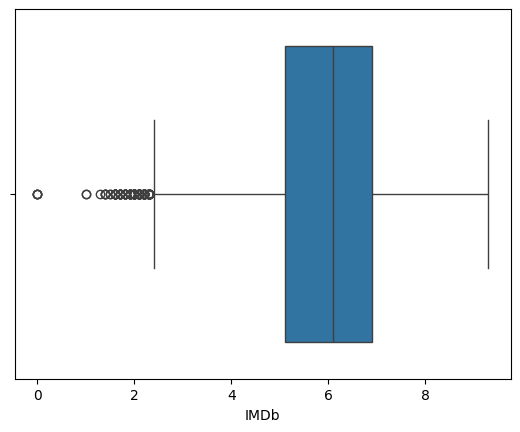

In [55]:
sns.boxplot(df,x='IMDb') # here in imdf column outliners are there 

<Axes: xlabel='Runtime'>

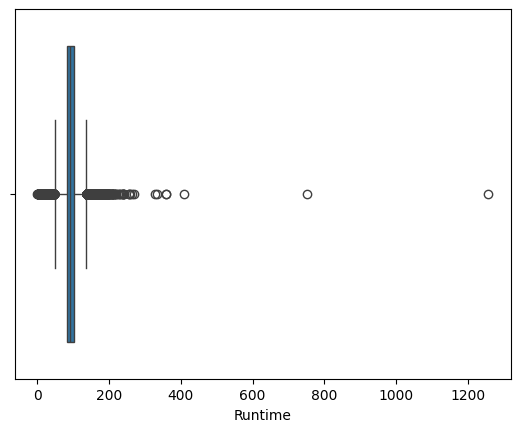

In [56]:
sns.boxplot(df,x='Runtime')# Here also outliners are there 

In [57]:
df['Age']=df['Age'].fillna('Unknown')
df['IMDb']=df['IMDb'].fillna(df['IMDb'].median()) # if outliners are present then must use median otherwise use mean
df['Runtime']=df['Runtime'].fillna(df['IMDb'].median())# here also outliner are present so use median see data on boxplot

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              16744 non-null  object 
 5   IMDb             16744 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16744 non-null  float64
dtypes: float64(2

In [59]:
for col in df.columns[[12,13,14,15]]:
    df[col]=df[col].fillna('Unknown')

In [60]:
df['Rotten Tomatoes']=df['Rotten Tomatoes'].str.strip('%').astype('float')

In [61]:
df.loc[df['IMDb'].round(0)==df['Rotten Tomatoes'].round(0)]

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
1184,1184,1185,Dream House,2011,13+,6.0,6.0,1,0,0,0,0,Jim Sheridan,"Drama,Mystery,Thriller","United States,Canada",English,84.0
1233,1233,1234,"Yours, Mine & Ours",2005,7+,5.5,6.0,1,0,1,0,0,Raja Gosnell,"Comedy,Family,Fantasy,Romance",United States,English,88.0
1420,1420,1421,Hangman,2017,18+,5.2,5.0,1,0,1,0,0,Johnny Martin,"Crime,Drama,Mystery,Thriller",United States,English,98.0
1704,1704,1705,Some Kind of Beautiful,2015,18+,5.7,6.0,1,0,0,0,0,Tom Vaughan,"Comedy,Romance","United States,United Kingdom",English,99.0
1801,1801,1802,The Black Prince,2017,13+,6.6,7.0,1,0,0,0,0,Kavi Raz,"Drama,History","United Kingdom,India,United States","English,Punjabi",118.0
4029,4029,4030,Abduction,2011,13+,5.1,5.0,0,1,1,0,0,John Singleton,"Action,Mystery,Thriller",United States,English,106.0
4047,4047,4048,"I, Frankenstein",2014,13+,5.1,5.0,0,1,1,0,0,Stuart Beattie,"Action,Fantasy,Sci-Fi","United States,Australia",English,92.0
4344,4344,4345,Beneath the Darkness,2012,18+,4.5,4.0,0,1,1,0,0,"Barbara Peeters,Jimmy T. Murakami","Horror,Sci-Fi",United States,English,80.0
6536,6536,6537,CBGB,2013,18+,6.6,7.0,0,0,1,0,0,Randall Miller,"Drama,Music",United States,English,102.0
6656,6656,6657,Bio-Dome,1996,13+,4.5,4.0,0,0,1,0,0,Jason Bloom,Comedy,United States,English,88.0


In [62]:
df['Runtime'].agg(['max','min','mean']) # Runtime col are no valid so remove the runtime.

max     1256.000000
min        1.000000
mean      90.326398
Name: Runtime, dtype: float64

In [63]:
cols=['Unnamed: 0','Rotten Tomatoes','Runtime','Type']
df=df.drop(columns=cols)
df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French"
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,Unknown,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English
16740,16741,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English
16741,16742,Sharks of Lost Island,2013,Unknown,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English
16742,16743,Man Among Cheetahs,2017,Unknown,6.6,0,0,0,1,Richard Slater-Jones,Documentary,United States,English


# DATA TRANSFORM

In [64]:
df=df.sort_values(by='Title')
df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
15901,15902,"""22"" A film about Veterans, Healthcare and Sui...",2018,Unknown,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
10302,10303,#IMomSoHard Live,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
15142,15143,#LoveSwag,2015,13+,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English
3330,3331,#Rucker50,2016,Unknown,5.3,1,0,0,0,Robert McCullough Jr.,Documentary,United States,English
2797,2798,#Selfie,2014,Unknown,6.1,1,0,0,0,Cristina Jacob,Comedy,Romania,Romanian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,3322,هجولة 2: المهمة الغامضة,2018,Unknown,3.8,1,0,0,0,Unknown,Unknown,Unknown,Unknown
13547,13548,जान तेरे नाम,1992,Unknown,6.0,0,0,1,0,Unknown,Unknown,Unknown,Unknown
3511,3512,​Maj Rati ​​Keteki,2017,Unknown,6.1,1,0,0,0,Santwana Bardoloi,Drama,India,Assamese
1565,1566,审死官,1992,7+,6.9,1,0,1,0,Unknown,Unknown,Unknown,Unknown


In [65]:
df['Title']=df['Title'].str.strip('I')
df['Title']=df['Title'].str.strip('#')


In [66]:
df.loc[~df['Title'].str.isalnum()]

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
15901,15902,"""22"" A film about Veterans, Healthcare and Sui...",2018,Unknown,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
10302,10303,IMomSoHard Live,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
2263,2264,cats_the_mewvie,2020,16+,5.2,1,0,0,0,Michael Margolis,Documentary,Canada,English
10827,10828,$100 and a T-Shirt: A Documentary About Zines ...,2004,Unknown,6.3,0,0,1,0,"Joe Biel,Phil Sano",Documentary,United States,English
14757,14758,$elfie Shootout,2016,16+,3.4,0,0,1,0,"Giorgio Daveed,Ron Jackson",Comedy,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2234,Öldür Beni Sevgilim,2019,Unknown,4.5,1,0,0,0,Senol Sönmez,"Comedy,Romance",Turkey,Turkish
1815,1816,İncir Reçeli 2,2014,13+,6.1,1,0,0,0,Aytaç Agirlar,"Drama,Romance",Turkey,Turkish
3321,3322,هجولة 2: المهمة الغامضة,2018,Unknown,3.8,1,0,0,0,Unknown,Unknown,Unknown,Unknown
13547,13548,जान तेरे नाम,1992,Unknown,6.0,0,0,1,0,Unknown,Unknown,Unknown,Unknown


In [67]:
df['Title']=df['Title'].str.replace('[^A-Za-z ]','',regex=True)

In [68]:
df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
15901,15902,A film about Veterans Healthcare and Suicide,2018,Unknown,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
10302,10303,IMomSoHard Live,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
15142,15143,LoveSwag,2015,13+,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English
3330,3331,Rucker,2016,Unknown,5.3,1,0,0,0,Robert McCullough Jr.,Documentary,United States,English
2797,2798,Selfie,2014,Unknown,6.1,1,0,0,0,Cristina Jacob,Comedy,Romania,Romanian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,3322,,2018,Unknown,3.8,1,0,0,0,Unknown,Unknown,Unknown,Unknown
13547,13548,,1992,Unknown,6.0,0,0,1,0,Unknown,Unknown,Unknown,Unknown
3511,3512,Maj Rati Keteki,2017,Unknown,6.1,1,0,0,0,Santwana Bardoloi,Drama,India,Assamese
1565,1566,,1992,7+,6.9,1,0,1,0,Unknown,Unknown,Unknown,Unknown


In [69]:
i=df.loc[(df['Title'].isin (['',' '])) | (df['Title'].str.isspace())].index
print(i)

Index([ 5712,  6393,  9128,  5080, 12169, 14327,  7468,  1750,   306,  4771,
        6833,  5670,  2414,   463, 14349,   358,  2849,  4014,  8974,  1763,
        9260, 11465,  3574,  9881,  2149,  2726,  9325,  3738,   962,  9683,
        1358,   289,  3321, 13547,  1565,  5286],
      dtype='int64')


In [70]:
df=df.drop(index=i,columns=['ID']).reset_index(drop=True)

In [71]:
df
#whenever you do drop must be use reset_index
# whever you split the col must be use strip 

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
0,A film about Veterans Healthcare and Suicide,2018,Unknown,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
1,IMomSoHard Live,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
2,LoveSwag,2015,13+,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English
3,Rucker,2016,Unknown,5.3,1,0,0,0,Robert McCullough Jr.,Documentary,United States,English
4,Selfie,2014,Unknown,6.1,1,0,0,0,Cristina Jacob,Comedy,Romania,Romanian
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,on Flux,2005,13+,5.4,0,1,0,0,Karyn Kusama,"Action,Adventure,Sci-Fi,Thriller","United States,Germany,Brazil,Italy",English
16704,ok Filim Hareketler Bunlar,2010,Unknown,4.3,1,0,0,0,Ozan Açiktan,Comedy,Turkey,Turkish
16705,ldr Beni Sevgilim,2019,Unknown,4.5,1,0,0,0,Senol Sönmez,"Comedy,Romance",Turkey,Turkish
16706,ncir Reeli,2014,13+,6.1,1,0,0,0,Aytaç Agirlar,"Drama,Romance",Turkey,Turkish


In [72]:
df[df.columns[[4,5,6,7]]].size

66832

In [73]:
ott_df=pd.melt(df,id_vars=['Title','Age','IMDb'],
               value_vars=['Netflix','Hulu','Prime Video','Disney+'],
               var_name='Platform',value_name='Availability')

In [74]:
ott_df=ott_df.loc[ott_df['Availability']==1].reset_index(drop=True)

In [75]:
ott_df

,Title,Age,IMDb,Platform,Availability
0,Rucker,Unknown,5.3,Netflix,1
1,Selfie,Unknown,6.1,Netflix,1
2,SquadGoals,Unknown,4.0,Netflix,1
3,catsthemewvie,16+,5.2,Netflix,1
4,realityhigh,Unknown,5.2,Netflix,1
...,...,...,...,...,...
17337,Zapped,all,5.1,Disney+,1
17338,Zenon Girl of the st Century,all,6.4,Disney+,1
17339,Zenon The Zequel,all,5.9,Disney+,1
17340,Zenon Z,all,5.5,Disney+,1


In [76]:
ott_df=ott_df.drop(columns='Availability')

In [77]:
ott_df

,Title,Age,IMDb,Platform
0,Rucker,Unknown,5.3,Netflix
1,Selfie,Unknown,6.1,Netflix
2,SquadGoals,Unknown,4.0,Netflix
3,catsthemewvie,16+,5.2,Netflix
4,realityhigh,Unknown,5.2,Netflix
...,...,...,...,...
17337,Zapped,all,5.1,Disney+
17338,Zenon Girl of the st Century,all,6.4,Disney+
17339,Zenon The Zequel,all,5.9,Disney+
17340,Zenon Z,all,5.5,Disney+


In [78]:
ott_df=ott_df.sort_values('Title')

In [79]:
ott_df

,Title,Age,IMDb,Platform
4521,Hours Leave,Unknown,5.2,Prime Video
4562,The Documentary,Unknown,7.8,Prime Video
3557,years later,Unknown,0.0,Hulu
4446,A film about Veterans Healthcare and Suicide,Unknown,6.1,Prime Video
4534,AM,Unknown,5.1,Prime Video
...,...,...,...,...
1383,ttefaq,7+,7.2,Netflix
16777,uwantmekillhim,Unknown,6.3,Prime Video
9352,ve Loved You So Long,13+,7.6,Prime Video
3548,x,18+,5.0,Hulu


In [80]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Directors', 'Genres', 'Country', 'Language'],
      dtype='object')

In [81]:

df['Age'] = df['Age'].str.replace('Unknown', 'Not Rated')

In [82]:
df

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language
0,A film about Veterans Healthcare and Suicide,2018,Not Rated,6.1,0,0,1,0,Unknown,Unknown,Unknown,Unknown
1,IMomSoHard Live,2019,18+,5.2,0,0,1,0,Brian Volk-Weiss,Comedy,United States,English
2,LoveSwag,2015,13+,5.4,0,0,1,0,Austin Davoren,"Short,Comedy,Drama,Romance",United States,English
3,Rucker,2016,Not Rated,5.3,1,0,0,0,Robert McCullough Jr.,Documentary,United States,English
4,Selfie,2014,Not Rated,6.1,1,0,0,0,Cristina Jacob,Comedy,Romania,Romanian
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,on Flux,2005,13+,5.4,0,1,0,0,Karyn Kusama,"Action,Adventure,Sci-Fi,Thriller","United States,Germany,Brazil,Italy",English
16704,ok Filim Hareketler Bunlar,2010,Not Rated,4.3,1,0,0,0,Ozan Açiktan,Comedy,Turkey,Turkish
16705,ldr Beni Sevgilim,2019,Not Rated,4.5,1,0,0,0,Senol Sönmez,"Comedy,Romance",Turkey,Turkish
16706,ncir Reeli,2014,13+,6.1,1,0,0,0,Aytaç Agirlar,"Drama,Romance",Turkey,Turkish


# DATA ANALYSIS

1.Find the no_Of_movies available in each platform.

In [83]:
df[['Netflix','Hulu','Prime Video','Disney+']].sum()

Netflix         3546
Hulu             900
Prime Video    12332
Disney+          564
dtype: int64

In [84]:
ott_df['Platform'].value_counts()

Platform
Prime Video    12332
Netflix         3546
Hulu             900
Disney+          564
Name: count, dtype: int64

C:\Users\roush\AppData\Local\Temp\ipykernel_8312\1838888549.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center right')


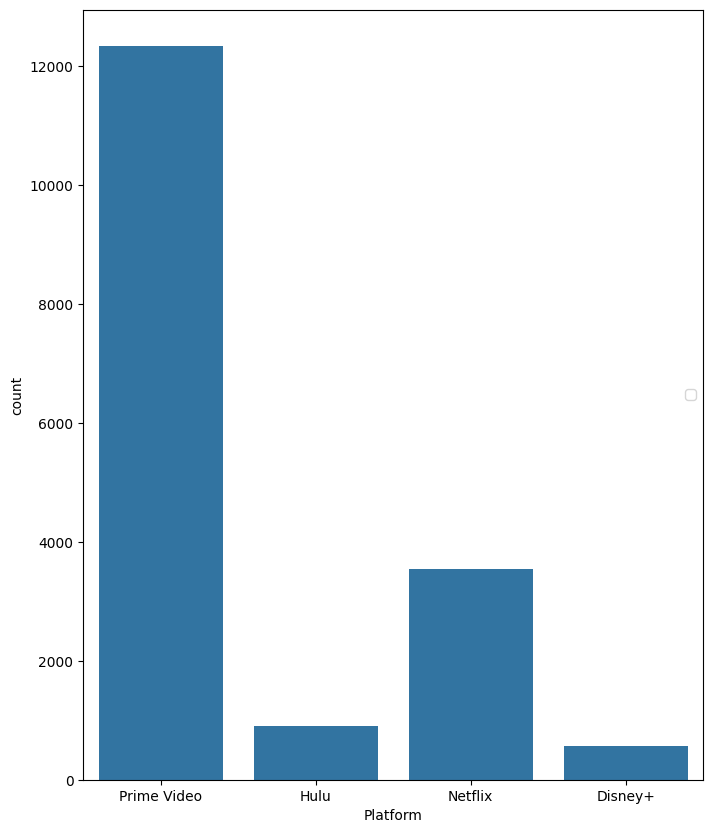

In [85]:
plt.figure(figsize=(8,10))
sns.countplot(ott_df,x="Platform")
plt.legend(loc='center right')
plt.show()

**Observation:**

1.Prime Video has a more no of movies.

2.Disney+ has a very less no of movies.

2.Find the movie which has got highest IMDB rating.

In [86]:
df['IMDb'].max()

np.float64(9.3)

In [87]:
df.loc[df['IMDb']==df['IMDb'].max(),'Title']

2383                                                Bounty
4211                                      Down But Not Out
8123                                       Love on a Leash
9129     My Next Guest with David Letterman and Shah Ru...
11901                                           Square One
12000               Steven Banks Home Entertainment Center
Name: Title, dtype: object

**Observation:**

1.The maximum higest rating of movies is 9.3

2.the Bounty movies has a highest Rating.

3.Find the directors if they have directed highest movies?

In [88]:
df['Directors'].value_counts().head(2)

Directors
Unknown        719
Jay Chapman     36
Name: count, dtype: int64

In [89]:
df.loc[df['Directors']!='Unknown','Directors'].value_counts().idxmax()

'Jay Chapman'

In [90]:
df.loc[df['Directors']!='Unknown','Directors'].mode()

0    Jay Chapman
Name: Directors, dtype: object

**Observation:**

1.Jay Chapman make highest no of movies.

4.Genres wise no_of_movies?

In [91]:
df['Genres'].value_counts().head(15)

Genres
Drama                   1339
Documentary             1227
Comedy                  1040
Comedy,Drama             446
Horror                   434
Drama,Romance            396
Comedy,Drama,Romance     332
Horror,Thriller          296
Comedy,Romance           289
Unknown                  270
Drama,Thriller           222
Thriller                 210
Action,Drama             173
Crime,Drama,Thriller     168
Crime,Drama              148
Name: count, dtype: int64

5.Age wise no_of_movies?

In [92]:
df['Age'].value_counts()

Age
Not Rated    9372
18+          3463
7+           1461
13+          1249
all           843
16+           320
Name: count, dtype: int64

6.Age wise no_of_movies in each platforms?

In [93]:
ott_df.pivot_table(index='Age',columns='Platform',values='Title',aggfunc='count',margins=True)

Platform,Disney+,Hulu,Netflix,Prime Video,All
Age,,,,,
13+,40,118,379,818,1355
16+,1,17,89,226,333
18+,3,289,749,2605,3646
7+,179,109,322,915,1525
Unknown,64,312,1877,7362,9615
all,277,55,130,406,868
All,564,900,3546,12332,17342


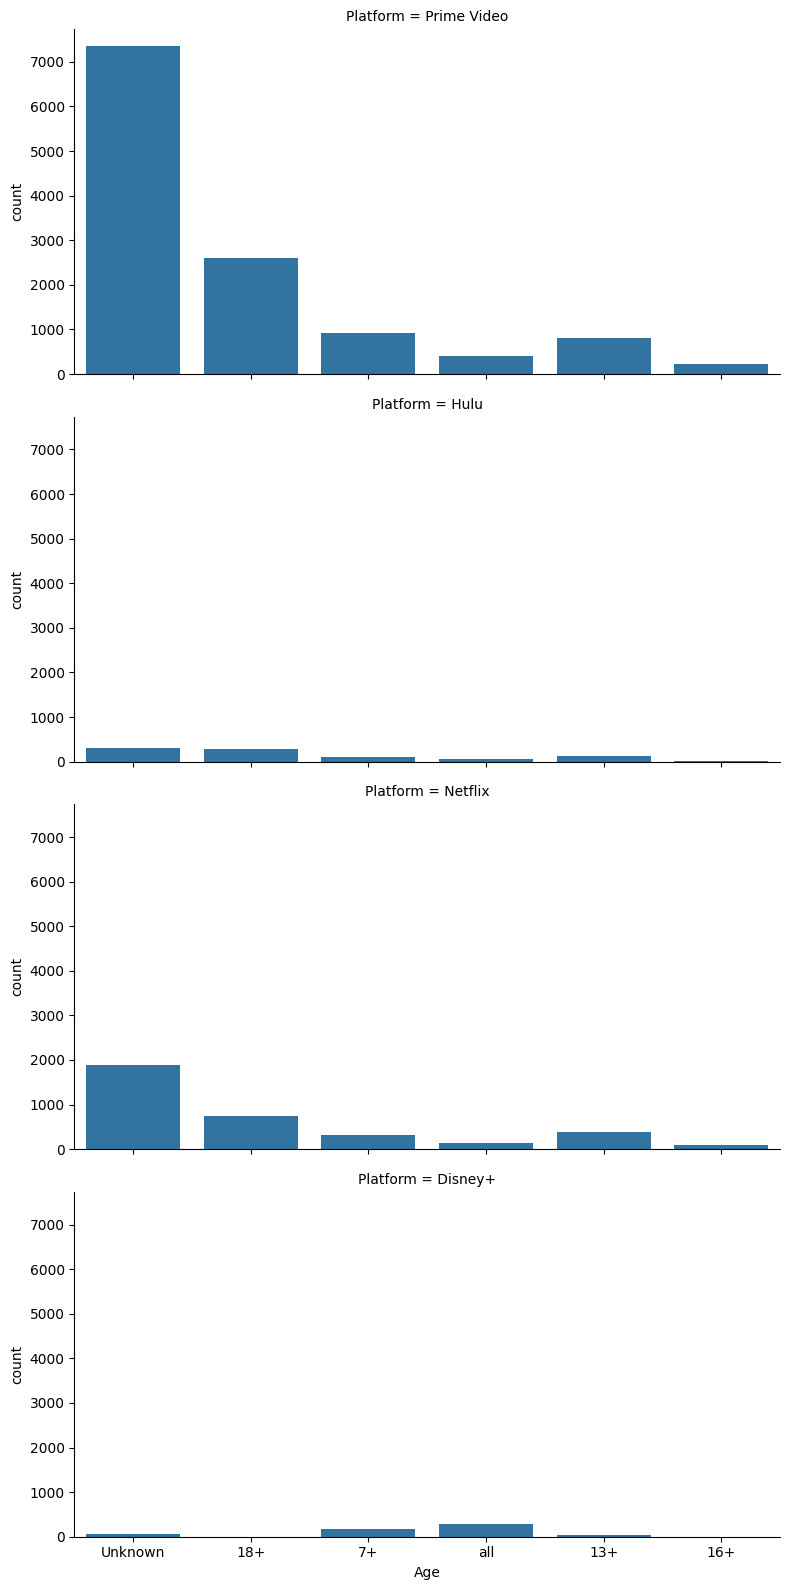

In [94]:
fg=sns.FacetGrid(ott_df,row='Platform',height=4,aspect=2)
fg.map_dataframe(sns.countplot,x='Age')
plt.show()

Q7.Which movie is available in all 4 platform?

In [97]:
df['platform_count'] = df[['Netflix','Hulu','Prime Video','Disney+']].sum(axis=1)

movies_all_4 = df[df['platform_count'] == 4]['Title']
movies_all_4

Series([], Name: Title, dtype: object)

Q8.Get the movies which are availble in 3 plts?

In [99]:
movies_3_platforms = df[df['platform_count'] == 3]['Title']
movies_3_platforms


1054                      Amy
2139                    Blame
4643                Evolution
6750                nside Out
8911                   Mother
9410     No Game No Life Zero
13726           The Interview
13793                 The Kid
14777              The Square
16641                  Zapped
Name: Title, dtype: object

Q9.Get the movies with highest generes?

In [ ]:
def count_genres(genres):
    if pd.isna(genres) or genres == '':
        return 0
    return len(genres.split(','))
df['genre_count'] = df['Genres'].apply(count_genres)


highest_genre_movies = df[
    df['genre_count'] == df['genre_count'].max()
][['Title', 'Genres', 'genre_count']]
highest_genre_movies

,Title,Genres,genre_count
5311,Gappa the Triphibian Monster,"Action,Adventure,Comedy,Drama,Family,Fantasy,H...",9


Q10.Platform wise highest IMDb rating?

In [101]:
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

highest_imdb = {}

for p in platforms:
    highest_imdb[p] = df[df[p] == 1]['IMDb'].max()

highest_imdb


{'Netflix': np.float64(9.3),
 'Hulu': np.float64(9.0),
 'Prime Video': np.float64(9.3),
 'Disney+': np.float64(8.7)}

Q11.Find the no_of_movies which is completely Horror Genre?

In [102]:
df[(df['Genres'] == 'Horror')].shape[0]


434

Q12.Find the no_of_Horror movies(either completly/as a part of the movies)?

In [103]:
df[df['Genres'].str.contains('Horror', case=False, na=False)].shape[0]


2195

Q13.Find the Movies which is available in more than 2 languages?

In [106]:
df[df['Language'].str.count(',') >= 2][['Title', 'Language']]


,Title,Language
13,And Your Name Is Jonah,"English,American Sign Language,Brazilian Sign ..."
68,Conquest of Paradise,"Spanish,Latin,Arabic,English"
89,Nights Till Morning,"English,French,Finnish"
116,Hours,"English,Russian,German,Korean,Arabic,Spanish,S..."
123,Palms,"French,English,Russian"
...,...,...
16655,Zinda,"Hindi,English,Thai"
16657,Zindagi Na Milegi Dobara,"Hindi,Japanese,Spanish,English"
16659,Zion Canyon Treasure of the Gods,"English,Japanese,Korean"
16687,Zubaan,"Hindi,English,Punjabi"
